### Feed-Forward Neural Network on CIFAR Data

In [28]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

# Make matplotlib plot pretty pictures
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 14.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# Neural Network Model (1 hidden layer)
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [30]:
# Hyper Parameters 
input_size = 32*32*3
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

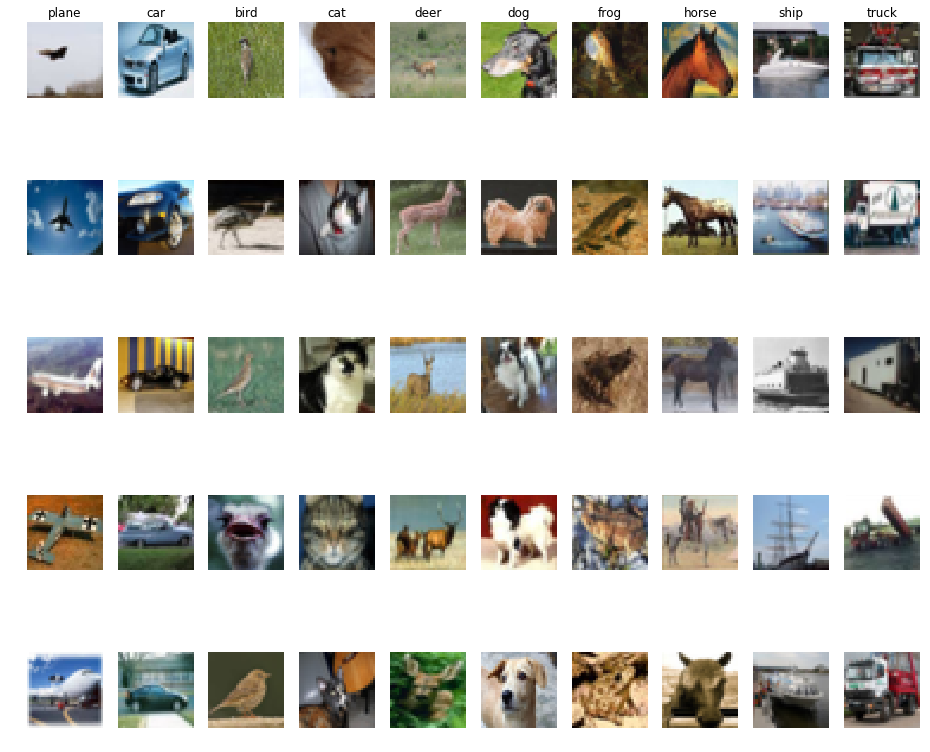

In [31]:
# CIFAR10 Dataset 
train_dataset = dsets.CIFAR10(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=False)

test_dataset = dsets.CIFAR10(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Explore the data
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Explore the CIFAR Data
X_train = 255*np.moveaxis(images.numpy(), 1, -1)
y_train = labels.numpy()

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
	ids = np.flatnonzero(y_train == y)
	ids = np.random.choice(ids, samples_per_class, replace=False)

	for i, idxs in enumerate(ids):
		plt_idx = i*num_classes+y+1
		plt.subplot(samples_per_class, num_classes, plt_idx)
		plt.imshow(X_train[idxs].astype('uint8'))
		plt.axis('off')
		if i == 0:
			plt.title(cls)

plt.show()

In [32]:
# Initialize and train the neural network

net = Net(input_size, hidden_size, num_classes)
net.cuda()   
    
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)  

# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = Variable(images.view(-1, 32*32*3).cuda())
        labels = Variable(labels.cuda())
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 32*32*3)).cuda()
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

# Save the Model
torch.save(net.state_dict(), 'model.pkl')

Epoch [1/10], Step [100/500], Loss: 1.9162
Epoch [1/10], Step [200/500], Loss: 1.7987
Epoch [1/10], Step [300/500], Loss: 1.9581
Epoch [1/10], Step [400/500], Loss: 1.7092
Epoch [1/10], Step [500/500], Loss: 1.6212
Epoch [2/10], Step [100/500], Loss: 1.4941
Epoch [2/10], Step [200/500], Loss: 1.5892
Epoch [2/10], Step [300/500], Loss: 1.7370
Epoch [2/10], Step [400/500], Loss: 1.9818
Epoch [2/10], Step [500/500], Loss: 1.6785
Epoch [3/10], Step [100/500], Loss: 1.5732
Epoch [3/10], Step [200/500], Loss: 1.7479
Epoch [3/10], Step [300/500], Loss: 1.6367
Epoch [3/10], Step [400/500], Loss: 1.5379
Epoch [3/10], Step [500/500], Loss: 1.6996
Epoch [4/10], Step [100/500], Loss: 1.4977
Epoch [4/10], Step [200/500], Loss: 1.6933
Epoch [4/10], Step [300/500], Loss: 1.5210
Epoch [4/10], Step [400/500], Loss: 1.5812
Epoch [4/10], Step [500/500], Loss: 1.5032
Epoch [5/10], Step [100/500], Loss: 1.3934
Epoch [5/10], Step [200/500], Loss: 1.4790
Epoch [5/10], Step [300/500], Loss: 1.5604
Epoch [5/10